In [1]:
import pandas as pd
import spacy

In [2]:
! python -m spacy download pl_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
nlp = spacy.load("pl_core_news_lg")

In [4]:
MAIN_DATA = pd.read_csv("/content/dane5.csv")
df_twitter = MAIN_DATA.copy()
df_twitter2 = df_twitter.copy()

In [92]:
#Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
df_twitter2["created_at"]= [elem.replace("Mon", "Poniedziałek") for elem in df_twitter2["created_at"]]
df_twitter2["created_at"] = [elem.replace("Tue", "Wtorek") for elem in df_twitter2["created_at"]]
df_twitter2["created_at"] = [elem.replace("Wed", "Środa") for elem in df_twitter2["created_at"]]
df_twitter2["created_at"]= [elem.replace("Thu", "Czwartek") for elem in df_twitter2["created_at"]]
df_twitter2["created_at"] = [elem.replace("Fri", "Piątek") for elem in df_twitter2["created_at"]]
df_twitter2["created_at"] = [elem.replace("Sat", "Sobota") for elem in df_twitter2["created_at"]]
df_twitter2["created_at"] = [elem.replace("Sun", "Niedziela") for elem in df_twitter2["created_at"]]


In [7]:
df_twitter2["created_at"]

,created_at
0,Wtorek 05 18 16:52:03 +0000 2021
1,Środa 05 19 11:31:01 +0000 2021
2,Wtorek 05 18 17:46:25 +0000 2021
3,Wtorek 05 18 19:49:34 +0000 2021
4,Środa 05 19 05:13:22 +0000 2021
...,...
476,Czwartek 05 13 11:03:58 +0000 2021
477,Czwartek 05 13 09:50:02 +0000 2021
478,Czwartek 05 13 08:16:57 +0000 2021
479,Czwartek 05 13 11:34:56 +0000 2021


In [93]:
#Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at

df_twitter2["created_at"] = [elem.replace("May", "05") for elem in df_twitter2["created_at"]]

In [94]:
df_twitter2["created_at"]

,created_at
0,Wtorek 05 18 16:52:03 +0000 2021
1,Środa 05 19 11:31:01 +0000 2021
2,Wtorek 05 18 17:46:25 +0000 2021
3,Wtorek 05 18 19:49:34 +0000 2021
4,Środa 05 19 05:13:22 +0000 2021
...,...
476,Czwartek 05 13 11:03:58 +0000 2021
477,Czwartek 05 13 09:50:02 +0000 2021
478,Czwartek 05 13 08:16:57 +0000 2021
479,Czwartek 05 13 11:34:56 +0000 2021


In [9]:
#Pobierz wszystkie linki do tweetów i przekaż je do listy.

lista_linki = df_twitter2["source"]
lista_linki = lista_linki.tolist()

In [10]:
lista_linki

['<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
 '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 '<a href="http://publicize.wp.com/" rel="nofollow">Jetpack.com</a>',
 '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 '<a href="https://buffer.com" rel="nofollow">Buffer</a>',
 '<a href="http://poland.berardi.tv" rel="nofollow">jobpoland</a>',
 '<a href="https://zapier.com/" rel="nofollow">Zapier.com</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone

In [11]:
#Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)

lista_urls = df_twitter2["urls"].tolist()
lista_urls = [elem for elem in lista_urls if not isinstance(elem, float)]

In [12]:
lista_urls

['https://tvn24.pl/biznes/z-kraju/praca-zdalna-w-kodeksie-pracy-ruszaja-konsultacje-5098320',
 'http://m.in http://niewidzialni.eu/Profilaktyka_po_pandemii,17989.html',
 'https://zyciestolicy.com.pl/projekt-ustawy-regulujacy-prace-zdalna-doplata-za-prad-i-internet-to-czesc-z-propozycji/',
 'http://www.rmf24.pl/ekonomia/news-praca-zdalna-po-epidemii-szef-bedzie-musial-zaplacic-za-prad,nId,5241995',
 'https://www.prawo.pl/kadry/praca-zdalna-w-epidemii-w-ue,508333.html',
 'https://poland.jobrat.net/2021/05/19/asystentka-praca-zdalna-warszawa/',
 'https://spidersweb.pl/bizblog/praca-zdalna-rachunki-prad-internet/',
 'http://zywiec.powiat.pl/post/xxv-zdalna-sesja-rady-powiatu-w-zywcu,4453.html',
 'https://gospodarka.dziennik.pl/praca/artykuly/8167209,praca-zdalna-iwona-michalek-ministerstwo-pracy.html?utm_source=dlvr.it&utm_medium=twitter',
 'https://zyciestolicy.com.pl/projekt-ustawy-regulujacy-prace-zdalna-doplata-za-prad-i-internet-to-czesc-z-propozycji/',
 'https://www.fakt.pl/pieniadze

In [13]:
#Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).

lista_media = df_twitter2["media"].tolist()
lista_media = [elem for elem in lista_media if not isinstance(elem, float)]

In [14]:
#Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords

def bez_stopwords(text):
    doc = nlp(text)
    filtered_words = [token.text for token in doc if not token.is_stop]
    return " ".join(filtered_words)

In [15]:
df_twitter2["text_without_stopwords"] = df_twitter2["text"].apply(bez_stopwords)
df_twitter2["text_without_stopwords"]

,text_without_stopwords
0,"[ WIDEO ] \n @CzarnekP : młodzież wiedzieć , P..."
1,Rozpoczynamy ustawowe konsultacje przepisów re...
2,"[ WIDEO ] \n @CzarnekP : młodzież wiedzieć , P..."
3,"[ WIDEO ] \n @CzarnekP : młodzież wiedzieć , P..."
4,Oczywiście związku nauka zdalną . https://t.co...
...,...
476,szkoła odpierdala przechodzi . napisałbym ryj ...
477,Zdalna szkoła zastąpi interakcji nauczycielem ...
478,Rekruter osoba orzeczeniem - praca zdalna - Da...
479,Zdalna szkoła zastąpi interakcji nauczycielem ...


In [16]:
#Wypisz top5 tweetów z największa liczbą polubień.

df_twitter2[["text","favorite_count"]].sort_values(by=["favorite_count"] , ascending = False).head()

,text,favorite_count
450,"Kochani, mamy to! Udało mi się załatwić sesję ...",481
475,Zdalna szkoła nie zastąpi interakcji z nauczyc...,375
398,"InPost zaliczył u mnie mocnego plusika, bo ofe...",178
214,"Kocham pracę zdalną, bo mogę siedzieć w krótki...",152
163,"Gdy dziecko ma zdalną plastykę, a zapomnieliśc...",77


In [17]:
#Wypisz top5 tweetów z największa liczbą retweetów.
df_twitter2[["text","retweet_count"]].sort_values(by=["retweet_count"] , ascending = False).head()

,text,retweet_count
480,Zdalna szkoła nie zastąpi interakcji z nauczyc...,74
413,Zdalna szkoła nie zastąpi interakcji z nauczyc...,74
411,Zdalna szkoła nie zastąpi interakcji z nauczyc...,74
409,Zdalna szkoła nie zastąpi interakcji z nauczyc...,74
407,Zdalna szkoła nie zastąpi interakcji z nauczyc...,74


In [18]:
#Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).
df_twitter2[["text", "possibly_sensitive"]][df_twitter2["possibly_sensitive"] == False]

,text,possibly_sensitive
1,Rozpoczynamy ustawowe konsultacje przepisów re...,False
5,"Pandemia, praca zdalna i lockdowny spowodowały...",False
8,Praca zdalna po epidemii? Szef będzie musiał z...,False
9,"Pandemia sprawiła, że biura opustoszały, a mie...",False
10,"Asystentka (praca zdalna), Warszawa - https://...",False
...,...,...
463,Asystent w Dziale Spedycji Morskiej - osoba z ...,False
469,Analityk ze znajomością języka angielskiego – ...,False
471,Asystent w Dziale Finansowym – praca zdalna - ...,False
475,Zdalna szkoła nie zastąpi interakcji z nauczyc...,False


In [19]:
#Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).
df_twitter2["user_created_at"] = pd.to_datetime(df_twitter2["user_created_at"], format='%a %b %d %H:%M:%S %z %Y')
df_twitter2[["text","user_created_at"]].sort_values(by=["user_created_at"], ascending = True).head(1)

,text,user_created_at
363,@antybodys @leweserce @Filaczynska Przecież od...,2008-04-12 04:09:40+00:00


In [20]:
#Wyświetl tweety użytkownika. który ma najwięcej followersów.
df_twitter2[["text","user_followers_count"]].sort_values(by=["user_followers_count"], ascending = False).head(1)

,text,user_followers_count
456,"Szkolna przemoc też może być zdalna. Tyle, że ...",896145


In [21]:
#Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)
df_twitter2[["user_name", "user_verified"]][df_twitter2["user_verified"] == True]

,user_name,user_verified
1,TVN24 BiS,True
15,Dziennik.pl,True
31,Business Insider Polska 🇵🇱,True
35,Forsal.pl,True
81,tvp.info 🇵🇱,True
99,Rzeczpospolita,True
158,Forsal.pl,True
160,Michał Kolanko,True
190,tvp.info 🇵🇱,True
217,Dziennik.pl,True


In [22]:
#Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu
Mon = df_twitter2["created_at"].str.contains("Poniedziałek").sum()
Tue = df_twitter2["created_at"].str.contains("Wtorek").sum()
Wed = df_twitter2["created_at"].str.contains("Środa").sum()
Thu = df_twitter2["created_at"].str.contains("Czwartek").sum()
Fri = df_twitter2["created_at"].str.contains("Piątek").sum()
Sat = df_twitter2["created_at"].str.contains("Sobota").sum()
Sun = df_twitter2["created_at"].str.contains("Niedziela").sum()
dni_tyg = [Mon, Tue, Wed, Thu, Fri, Sat, Sun]
max(dni_tyg)

#odp. środa (109)

109

In [ ]:
#Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons
#Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places
#Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations


In [76]:
#Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons

def extract_persons(text):
  doc = nlp(text)
  persons = [ent.text for ent in doc.ents if ent.label_ == "persName"]
  return persons if persons else None


In [77]:
#Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places

def extract_places(text):
  doc = nlp(text)
  places = [ent.text for ent in doc.ents if ent.label_ == "placeName"]
  return places if places else None



In [78]:
#Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

def extract_organizations(text):
  doc = nlp(text)
  organizations = [ent.text for ent in doc.ents if ent.label_ == "orgName"]
  return organizations if organizations else None

In [79]:
df_twitter2["persons"] = df_twitter2["text"].apply(extract_persons)
df_twitter2["places"] = df_twitter2["text"].apply(extract_places)
df_twitter2["organizations"] = df_twitter2["text"].apply(extract_organizations)

In [80]:
df_twitter2

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,persons,places,organizations
0,NaN,Wtorek 05 18 16:52:03 +0000 2021,NaN,NaN,NaN,0,1394697302728749068,NaN,NaN,NaN,...,Bartek Grzebalski 🇵🇱♥💪✝️,Bartek93794875,889206,NaN,NaN,False,"[ WIDEO ] \n @CzarnekP : młodzież wiedzieć , P...",None,"[Polska, Polski]",None
1,NaN,Środa 05 19 11:31:01 +0000 2021,NaN,NaN,https://tvn24.pl/biznes/z-kraju/praca-zdalna-w...,2,1394978896660078595,NaN,NaN,NaN,...,TVN24 BiS,TVN24BiS,76779,NaN,http://tvn24bis.pl/,True,Rozpoczynamy ustawowe konsultacje przepisów re...,"[Iwona Michałek, https://t.co/hnPZd1vUMZ]",None,None
2,NaN,Wtorek 05 18 17:46:25 +0000 2021,NaN,NaN,NaN,0,1394710981184475136,NaN,NaN,NaN,...,magda,Magdaiks,229241,NaN,NaN,False,"[ WIDEO ] \n @CzarnekP : młodzież wiedzieć , P...",None,"[Polska, Polski]",None
3,NaN,Wtorek 05 18 19:49:34 +0000 2021,NaN,NaN,NaN,0,1394741976038350849,NaN,NaN,NaN,...,Krzysztof 🇵🇱.,KrzysztofKando1,104046,NaN,NaN,False,"[ WIDEO ] \n @CzarnekP : młodzież wiedzieć , P...",None,"[Polska, Polski]",None
4,NaN,Środa 05 19 05:13:22 +0000 2021,NaN,NaN,NaN,0,1394883858701639684,NaN,NaN,NaN,...,Krzysztof Strojek,KKStrojek,47074,NaN,NaN,False,Oczywiście związku nauka zdalną . https://t.co...,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,NaN,Czwartek 05 13 11:03:58 +0000 2021,NaN,NaN,NaN,2,1392797762501156869,NaN,NaN,NaN,...,dominic,loveyoulikegod,3659,NaN,NaN,False,szkoła odpierdala przechodzi . napisałbym ryj ...,None,None,None
477,NaN,Czwartek 05 13 09:50:02 +0000 2021,NaN,NaN,NaN,0,1392779156941856772,NaN,NaN,NaN,...,Marcin Pioskur,soipruk,18248,NaN,NaN,False,Zdalna szkoła zastąpi interakcji nauczycielem ...,None,None,None
478,NaN,Czwartek 05 13 08:16:57 +0000 2021,NaN,NaN,https://alleopole.pl/ogloszenie/33861/rekruter...,0,1392755734404812800,NaN,NaN,NaN,...,Wojciech Kac,wojciech_kac,41215,NaN,NaN,False,Rekruter osoba orzeczeniem - praca zdalna - Da...,None,None,None
479,NaN,Czwartek 05 13 11:34:56 +0000 2021,NaN,NaN,NaN,0,1392805558479171586,NaN,NaN,NaN,...,Obserwatorr,ObiektywnyObse2,207633,NaN,NaN,False,Zdalna szkoła zastąpi interakcji nauczycielem ...,None,None,None


In [ ]:
#Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia

In [99]:
import matplotlib.pyplot as plt

In [101]:
dni_tyg

[72, 83, 57, 109, 59, 42, 59]

In [105]:
tweets_count = [Mon, Tue, Wed, Thu, Fri, Sat, Sun]
tweets_count
dni_tyg = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


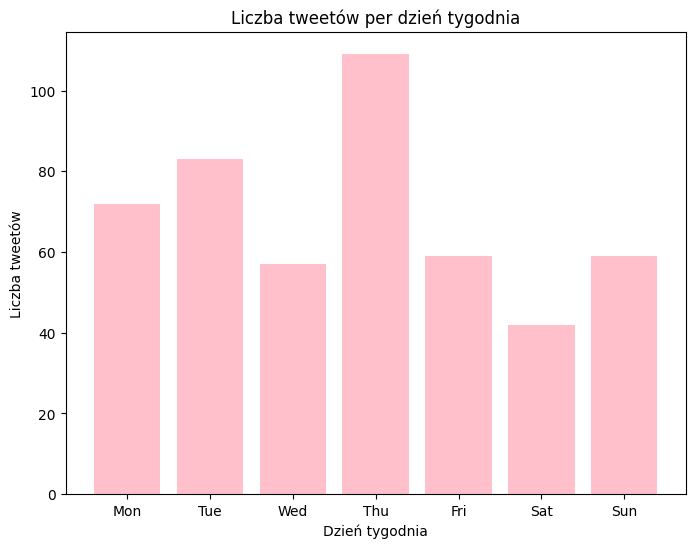

In [110]:
plt.figure(figsize=(8, 6))
plt.bar(dni_tyg, tweets_count, color="pink")
plt.title('Liczba tweetów per dzień tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.show()